# Binary Search Tree

Binary search tree is a data structure that quickly allows us to maintain a sorted list of numbers.

- It is called a binary tree because each tree node has a maximum of two children.
- It is called a search tree because it can be used to serach for the presence of a number in `0 (log(n))` time.

The properties that separate a binary search tree from a regular binary tree is :

1. All nodes of left subtree are less than the root node.
2. All nodes of right subtree are more thatn the root node.
3. Both subtrees of each node are also BSTs i.e they have the above two properties.

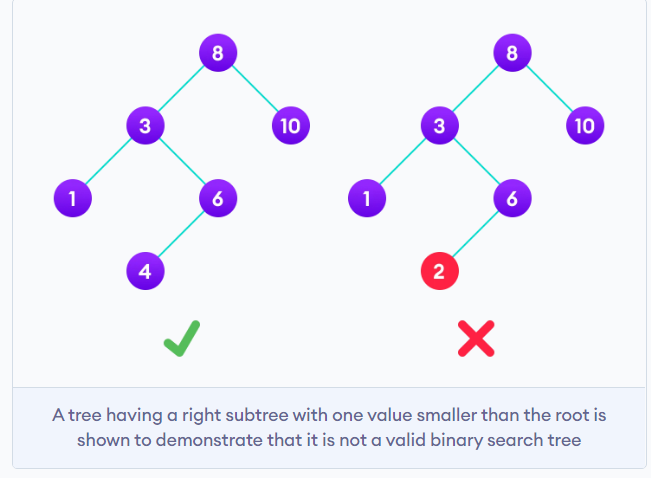


The binary tree on the right isn't a binary search tree because the right subtree of the node "3" contains a value smaller that it.

There are two basic operations that you can perform on a binary search tree:

## Search Operation

The algorithm depends on the property of BST that if each left subtree has values below root and each right subtree has values above the root.

If the value is below the root, we can say for sure that the value is not in the right subtree; we need to only search in the left subtree and if the value is above the root, we can say for sure that the value is not in the left subtree; we need to only search in the right subtree.

#### Algorithm

```python
If root == NULL
    return NULL;

If number == root -> data
    return root -> data;
    
If number < root -> data
    return search(root -> left)
 
If number > root -> data
    return search(root -> right)

```

**Let us try to visualize this with a diagram**

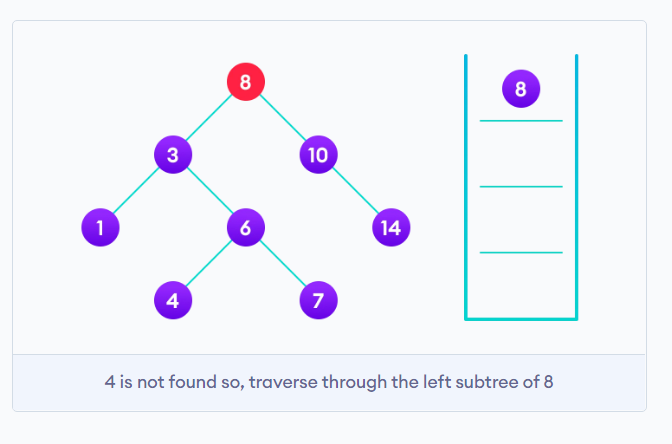

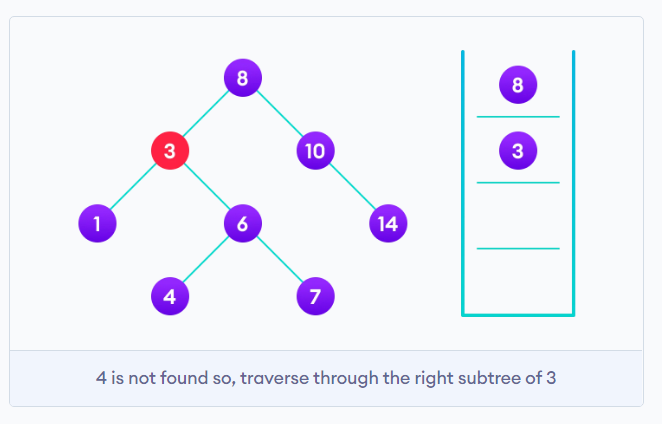

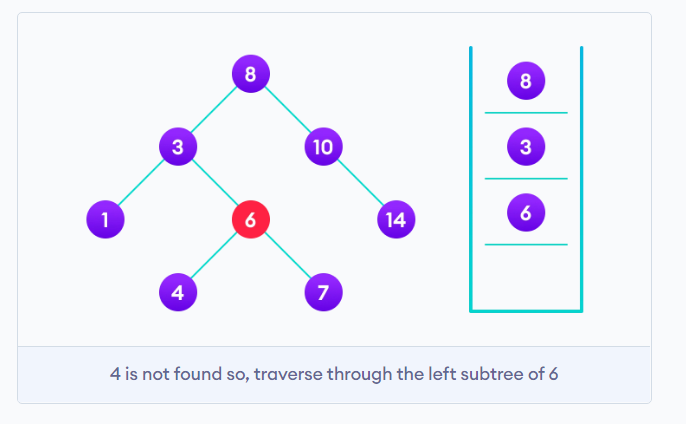

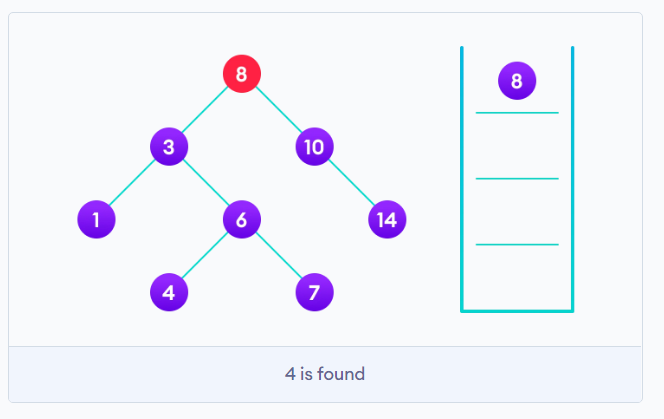

If the value is found, we return the value so that it gets propagated in each recursion step as shown in the image below.

If you might have noticed, we have called return search (struct node*) four times. When we return either the new node or NULL, the value gets returned again and again until search (root) returns the final result.

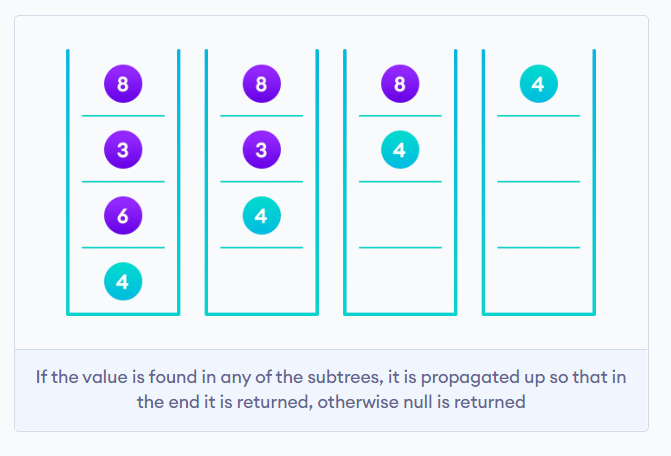

If the value is not found, we eventually reach the left or right child of a leaf node which is NULL and it gets propagated and returned.

### Insert Operation

Inserting a value in the correct position is similar to searching because we try to maintain the rule that the left subtree is lesser than root and the right subtree is larger than root.

We keep going to either right subtree or left subtree depending on the value and when we reach a point left or right subtree is null, we put the new node there.

```python

If node == NULL
    return createNode(data)

if (data < node -> data)
    node -> left = insert(node -> left, data);
    
else if (data > node -> data)
    node -> right = insert(node -> right, data);
    
return node;
```

The algorithm isn't as simple as it looks. Let's try to visualize how we add a number to an existing BST.

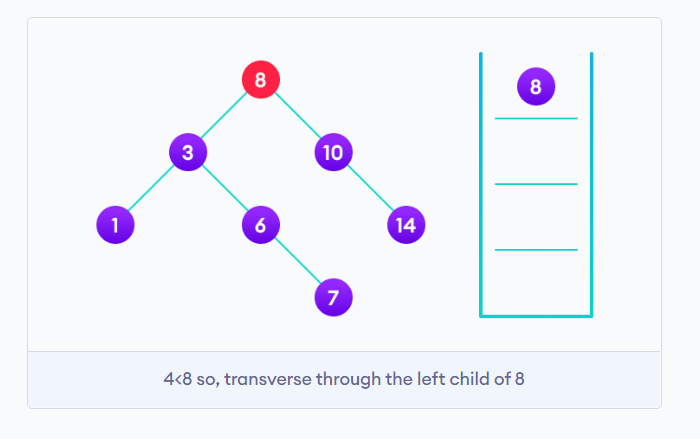

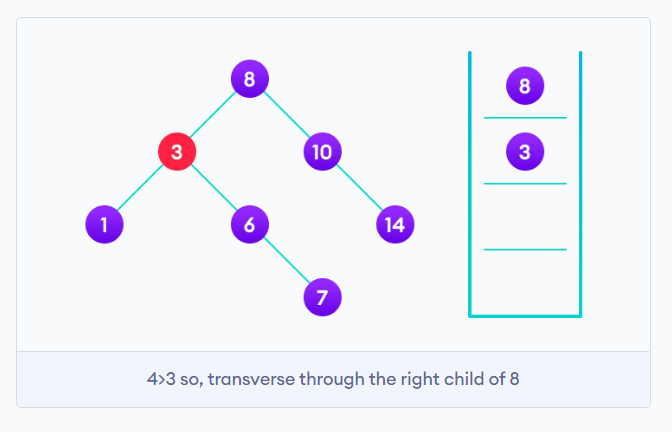

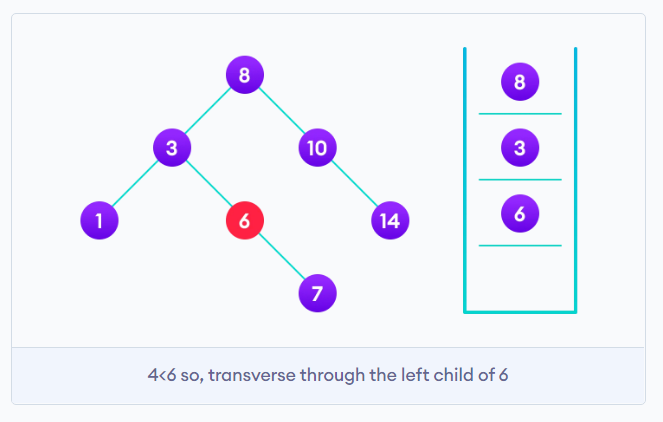

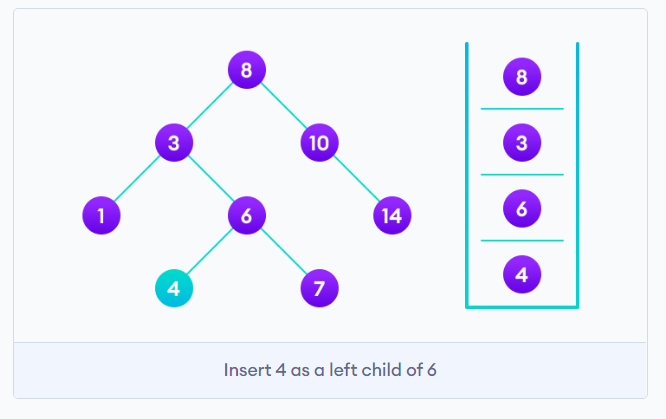

We have attached the node but we still have to exit from the function without doing any damange to the rest of the tree. This is where the `return node;` at the end comes in handy. In the case of `NULL`, the newly created node is returned and attached to the parent node, otherwise the same node is returned without any change as we go up until we return to the root.

This makes sure that as we move back up the tree, the other node connections aren't changed.

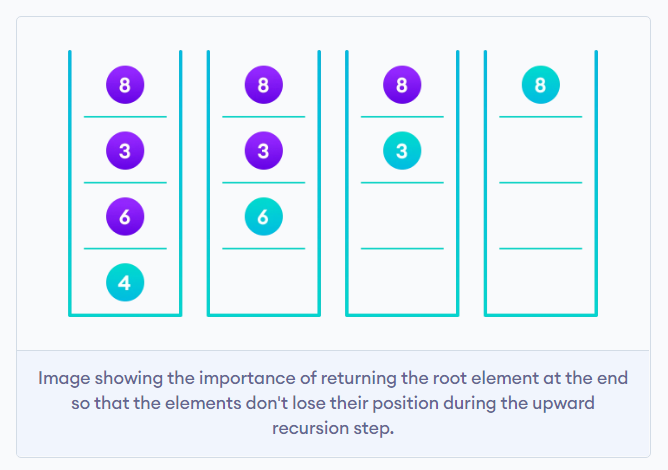

### Deletion Operation

There are three cases for deleting a node from a binary search tree.


### Case I

In the first case, the node to be deleted is the leaf node. In such a case, simply delete the node from the tree.

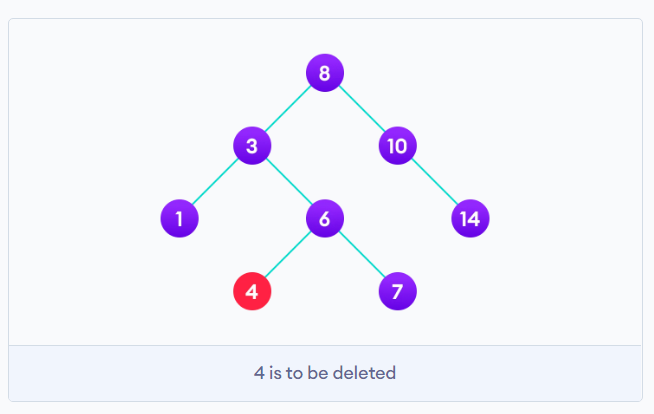

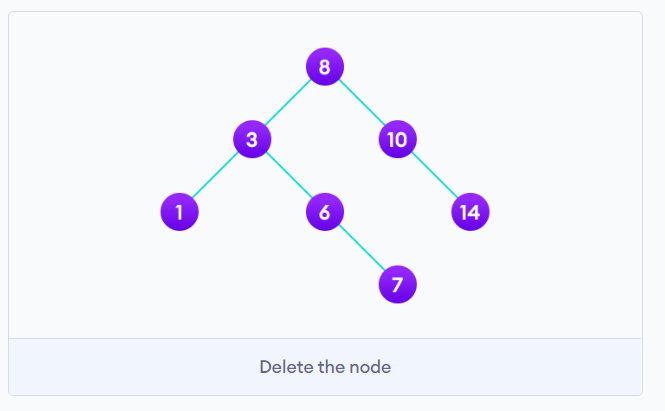


### Case II

In the second case, the node to be deleted lies has a single child node. In such a case follow the steps below:

1. Replace that node with its child node.
2. Remove the child node from its original position.

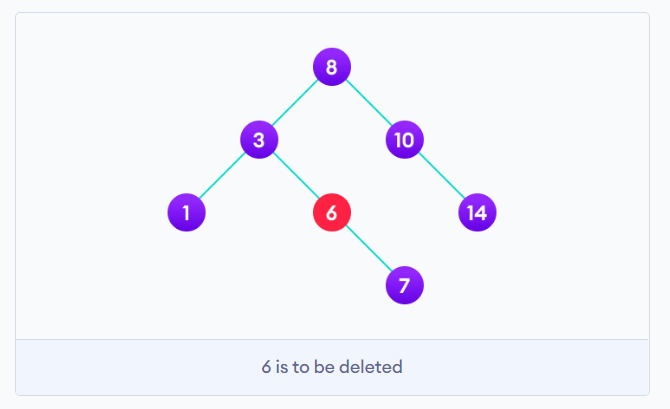

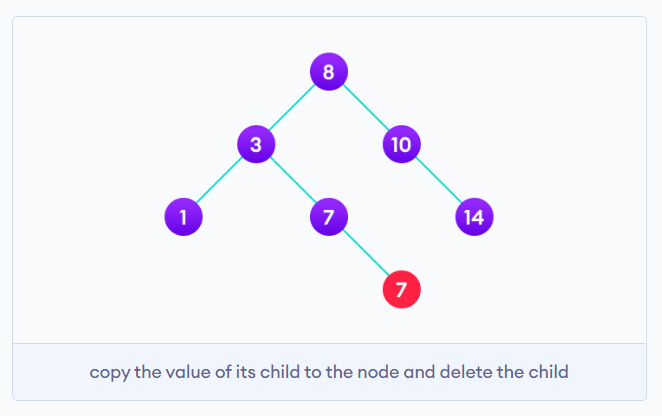

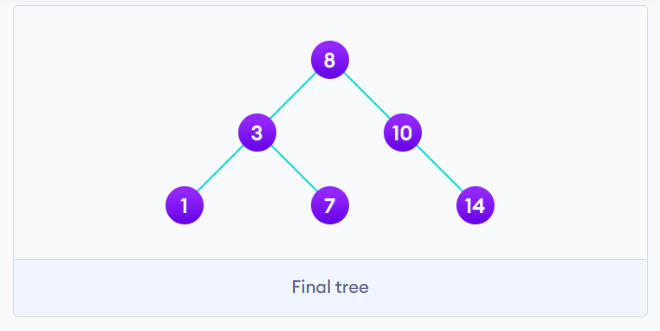

### Case III

In the third case, the node to be deleted has two children. In such a case follow the steps below:

1. Get the inorder successor of that node.
2. Replace the node with the inorder successor.
3. Remove the inorder successor from its original position.

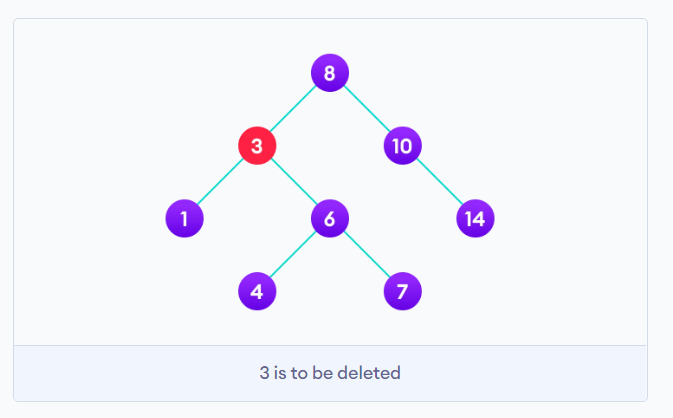

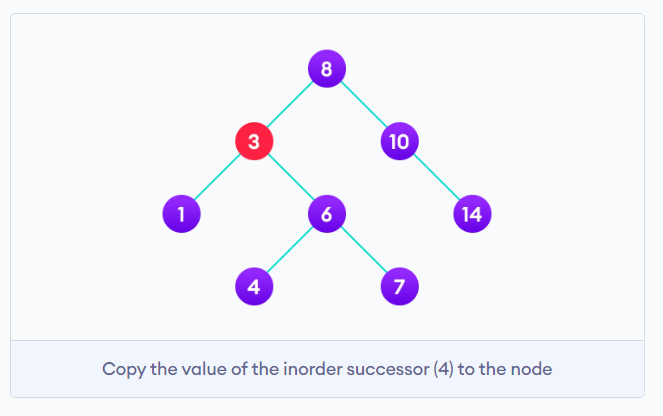

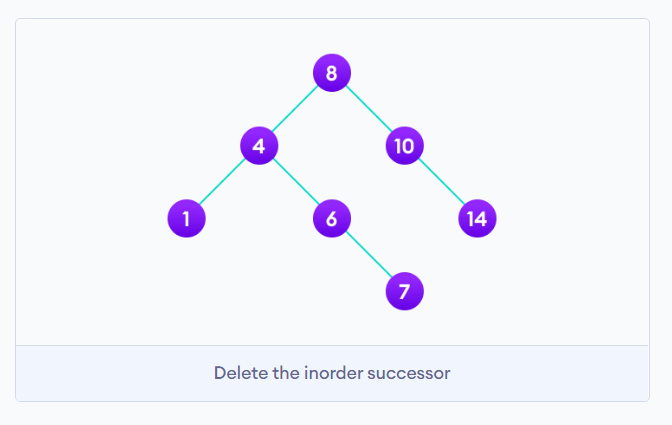

In [1]:
# Binary Search Tree operations in Python

# Create a node

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        
# Inoder traversal

def inorder(root):
    if root is not None:
        # Traverse left
        inorder(root.left)
        
        # Traverse root
        print(str(root.key) + "->", end = ' ')
        
        # Traverse right
        inorder(root.right)
        
# Insert a node
def insert(node, key):
    
    # Return a new node if the tree is empty
    if node is None:
        return Node(key)
    
    # Traverse to the right place and insert the node
    if key < node.key:
        node.left = insert(node.left, key)
    else:
        node.right = insert(node.right, key)
    
    return node


# Find the inorder successor
def minValueNode(node):
    current = node
    
    # Find the leftmost leaf
    while(current.left is not None):
        current = current.left
    
    return current


# Deleting a node
def deleteNode(root, key):
    
    # Return if the tree is empty
    if root is None:
        return root
    
    # Find the node to be deleted
    if key < root.key:
        root.left = deleteNode(root.left, key)
    elif(key > root.key):
        root.right = deleteNode(root.right, key)
    else:
        # If the node is with only one child or no child
        if root.left is None:
            temp = root.right
            root = None
            return temp
        
        elif root.right is None:
            temp = root.left
            root = None
            return temp
        
        # iF the node has two children
        # place the inorder successor in position of the node to
        # be deleted
        temp = minValueNode(root.right)
        
        root.key = temp.key
        
        # Delete the inorder successor
        root.right = deleteNode(root.right, temp.key)
        
    return root

root = None
root = insert(root, 8)
root = insert(root, 3)
root = insert(root, 1)
root = insert(root, 6)
root = insert(root, 7)
root = insert(root, 10)
root = insert(root, 14)
root = insert(root, 4)

print("Inorder traversal:", end = ' ')
inorder(root)


print('\n Delete 10')
root = deleteNode(root, 10)

print('Inorder traversal:', end = ' ')
inorder(root)

Inorder traversal: 1-> 3-> 4-> 6-> 7-> 8-> 10-> 14-> 
 Delete 10
Inorder traversal: 1-> 3-> 4-> 6-> 7-> 8-> 14-> 

### Example 2:


In [2]:
class BinarySearchTreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    def add_child(self, data):
        if data == self.data:
            return # node already exist

        if data < self.data:
            if self.left:
                self.left.add_child(data)
            else:
                self.left = BinarySearchTreeNode(data)
        else:
            if self.right:
                self.right.add_child(data)
            else:
                self.right = BinarySearchTreeNode(data)


    def search(self, val):
        if self.data == val:
            return True

        if val < self.data:
            if self.left:
                return self.left.search(val)
            else:
                return False

        if val > self.data:
            if self.right:
                return self.right.search(val)
            else:
                return False

    def in_order_traversal(self):
        elements = []
        if self.left:
            elements += self.left.in_order_traversal()

        elements.append(self.data)

        if self.right:
            elements += self.right.in_order_traversal()

        return elements


def build_tree(elements):
    print("Building tree with these elements:",elements)
    root = BinarySearchTreeNode(elements[0])

    for i in range(1,len(elements)):
        root.add_child(elements[i])

    return root

if __name__ == '__main__':
    countries = ["India","Pakistan","Germany", "USA","China","India","UK","USA"]
    country_tree = build_tree(countries)

    print("UK is in the list? ", country_tree.search("UK"))
    print("Sweden is in the list? ", country_tree.search("Sweden"))

    numbers_tree = build_tree([17, 4, 1, 20, 9, 23, 18, 34])
    print("In order traversal gives this sorted list:",numbers_tree.in_order_traversal())

Building tree with these elements: ['India', 'Pakistan', 'Germany', 'USA', 'China', 'India', 'UK', 'USA']
UK is in the list?  True
Sweden is in the list?  False
Building tree with these elements: [17, 4, 1, 20, 9, 23, 18, 34]
In order traversal gives this sorted list: [1, 4, 9, 17, 18, 20, 23, 34]


### Example 3:

In [3]:
class BinarySearchTreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    def add_child(self, data):
        if data == self.data:
            return # node already exist

        if data < self.data:
            if self.left:
                self.left.add_child(data)
            else:
                self.left = BinarySearchTreeNode(data)
        else:
            if self.right:
                self.right.add_child(data)
            else:
                self.right = BinarySearchTreeNode(data)


    def search(self, val):
        if self.data == val:
            return True

        if val < self.data:
            if self.left:
                return self.left.search(val)
            else:
                return False

        if val > self.data:
            if self.right:
                return self.right.search(val)
            else:
                return False

    def in_order_traversal(self):
        elements = []
        if self.left:
            elements += self.left.in_order_traversal()

        elements.append(self.data)

        if self.right:
            elements += self.right.in_order_traversal()

        return elements

    def delete(self, val):
        if val < self.data:
            if self.left:
                self.left = self.left.delete(val)
        elif val > self.data:
            if self.right:
                self.right = self.right.delete(val)
        else:
            if self.left is None and self.right is None:
                return None
            elif self.left is None:
                return self.right
            elif self.right is None:
                return self.left

            min_val = self.right.find_min()
            self.data = min_val
            self.right = self.right.delete(min_val)

        return self

    def find_max(self):
        if self.right is None:
            return self.data
        return self.right.find_max()

    def find_min(self):
        if self.left is None:
            return self.data
        return self.left.find_min()


def build_tree(elements):
    print("Building tree with these elements:",elements)
    root = BinarySearchTreeNode(elements[0])

    for i in range(1,len(elements)):
        root.add_child(elements[i])

    return root

if __name__ == '__main__':
    numbers_tree = build_tree([17, 4, 1, 20, 9, 23, 18, 34])
    numbers_tree.delete(20)
    print("After deleting 20 ",numbers_tree.in_order_traversal()) # this should print [1, 4, 9, 17, 18, 23, 34]

    numbers_tree = build_tree([17, 4, 1, 20, 9, 23, 18, 34])
    numbers_tree.delete(9)
    print("After deleting 9 ",numbers_tree.in_order_traversal())  # this should print [1, 4, 17, 18, 20, 23, 34]

    numbers_tree = build_tree([17, 4, 1, 20, 9, 23, 18, 34])
    numbers_tree.delete(17)
    print("After deleting 17 ",numbers_tree.in_order_traversal())  # this should print [1, 4, 9, 18, 20, 23, 34]

Building tree with these elements: [17, 4, 1, 20, 9, 23, 18, 34]
After deleting 20  [1, 4, 9, 17, 18, 23, 34]
Building tree with these elements: [17, 4, 1, 20, 9, 23, 18, 34]
After deleting 9  [1, 4, 17, 18, 20, 23, 34]
Building tree with these elements: [17, 4, 1, 20, 9, 23, 18, 34]
After deleting 17  [1, 4, 9, 18, 20, 23, 34]
